Saving Butterfly.webp to Butterfly (9).webp


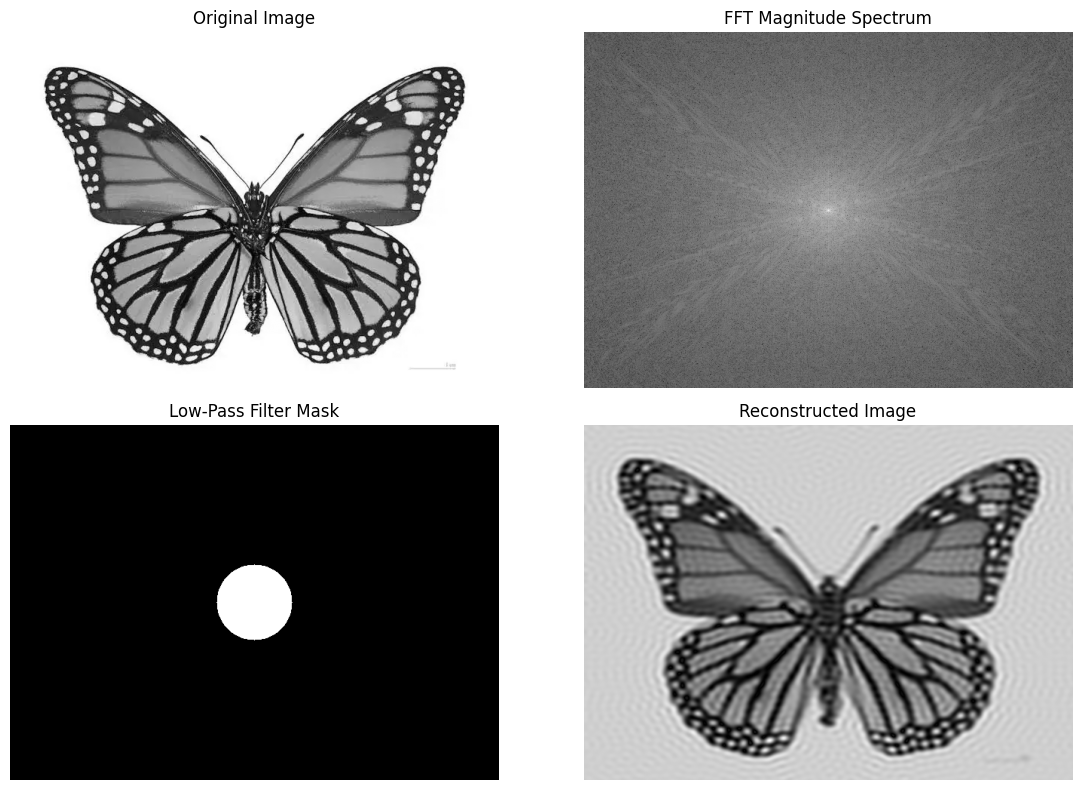

In [ ]:
# -------------------------------
# Step 1: Upload Image
# -------------------------------
from google.colab import files
uploaded = files.upload()

# -------------------------------
# Step 2: Read Image in Grayscale
# -------------------------------
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Check if any files were uploaded
if len(uploaded) == 0:
    print("No file was uploaded. Please try again.")
else:
    # Get the uploaded file name
    filename = list(uploaded.keys())[0]

    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Image '{filename}' not loaded. Please check the file format.")
    else:
        # -------------------------------
        # Step 3: Apply 2D FFT
        # -------------------------------
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)  # Move zero-frequency component to the center
        magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

        # -------------------------------
        # Step 4: Create Low-Pass Filter
        # -------------------------------
        rows, cols = img.shape
        crow, ccol = rows // 2, cols // 2
        mask = np.zeros((rows, cols), np.uint8)

        # Low-pass filter: keep only low frequencies inside a circle
        radius = 50  # change this for more/less blur
        cv2.circle(mask, (ccol, crow), radius, 1, -1)

        # -------------------------------
        # Step 5: Apply Filter in Frequency Domain
        # -------------------------------
        fshift_filtered = fshift * mask

        # -------------------------------
        # Step 6: Inverse FFT to Reconstruct
        # -------------------------------
        f_ishift = np.fft.ifftshift(fshift_filtered)
        img_reconstructed = np.fft.ifft2(f_ishift)
        img_reconstructed = np.abs(img_reconstructed)

        # -------------------------------
        # Step 7: Show Results
        # -------------------------------
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
        plt.title('Original Image'), plt.axis('off')

        plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
        plt.title('FFT Magnitude Spectrum'), plt.axis('off')

        plt.subplot(2, 2, 3), plt.imshow(mask * 255, cmap='gray')
        plt.title('Low-Pass Filter Mask'), plt.axis('off')

        plt.subplot(2, 2, 4), plt.imshow(img_reconstructed, cmap='gray')
        plt.title('Reconstructed Image'), plt.axis('off')

        plt.tight_layout()
        plt.show()

Saving Butterfly.webp to Butterfly (8).webp


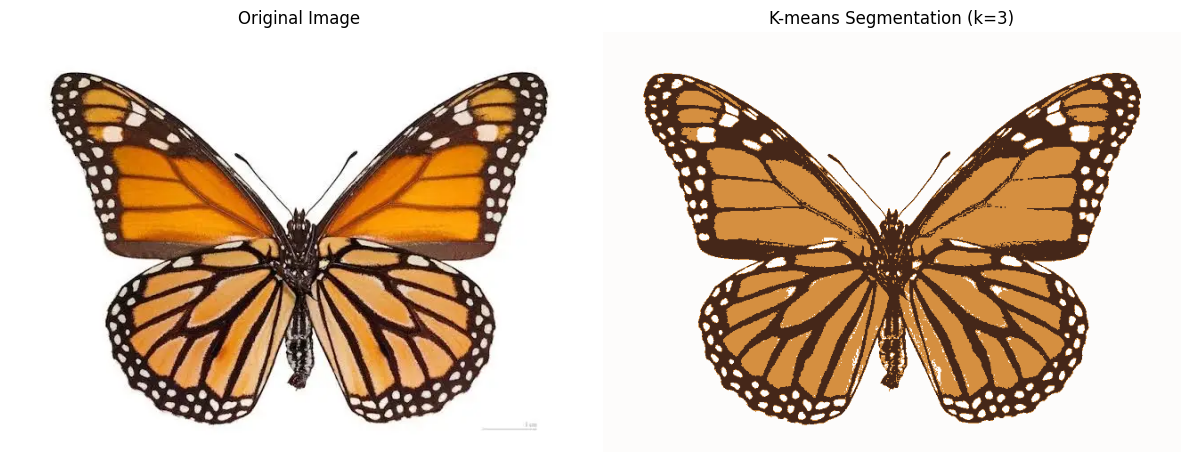

In [11]:
# -------------------------------
# Step 1: Upload Image
# -------------------------------
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get uploaded filename
filename = list(uploaded.keys())[0]

# -------------------------------
# Step 2: Read Image (in color)
# -------------------------------
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR -> RGB for plotting

# -------------------------------
# Step 3: Reshape the image for K-means
# -------------------------------
pixel_values = img.reshape((-1, 3))   # flatten to (num_pixels, 3)
pixel_values = np.float32(pixel_values)

# -------------------------------
# Step 4: Define K-means criteria and apply
# -------------------------------
k = 3  # number of clusters (change as needed)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Apply KMeans
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# -------------------------------
# Step 5: Convert results back into image
# -------------------------------
centers = np.uint8(centers)  # convert centers back to uint8
segmented_image = centers[labels.flatten()]  # map labels to colors
segmented_image = segmented_image.reshape(img.shape)

# Optionally: create a mask for one cluster (e.g., cluster 0)
cluster_mask = (labels.flatten() == 0)
segmented_cluster = np.zeros_like(img)
segmented_cluster = centers[0] * cluster_mask[:, None]
segmented_cluster = segmented_cluster.reshape(img.shape)

# -------------------------------
# Step 6: Show results
# -------------------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"K-means Segmentation (k={k})")
plt.axis("off")

plt.tight_layout()
plt.show()


Saving Butterfly.webp to Butterfly (7).webp
Saving Butterfly1.jpg to Butterfly1 (3).jpg


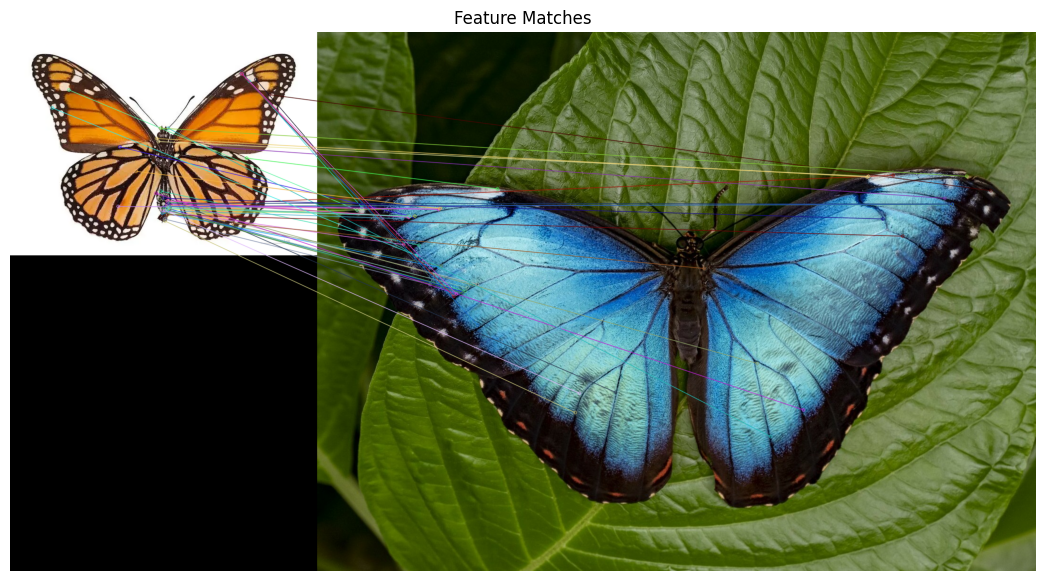

Fundamental Matrix:
 [[ 9.08084212e-07  3.32916969e-07 -2.65826309e-04]
 [-2.82397844e-07  1.44016262e-05 -2.04185656e-03]
 [-9.21326071e-04 -5.32386706e-03  1.00000000e+00]]


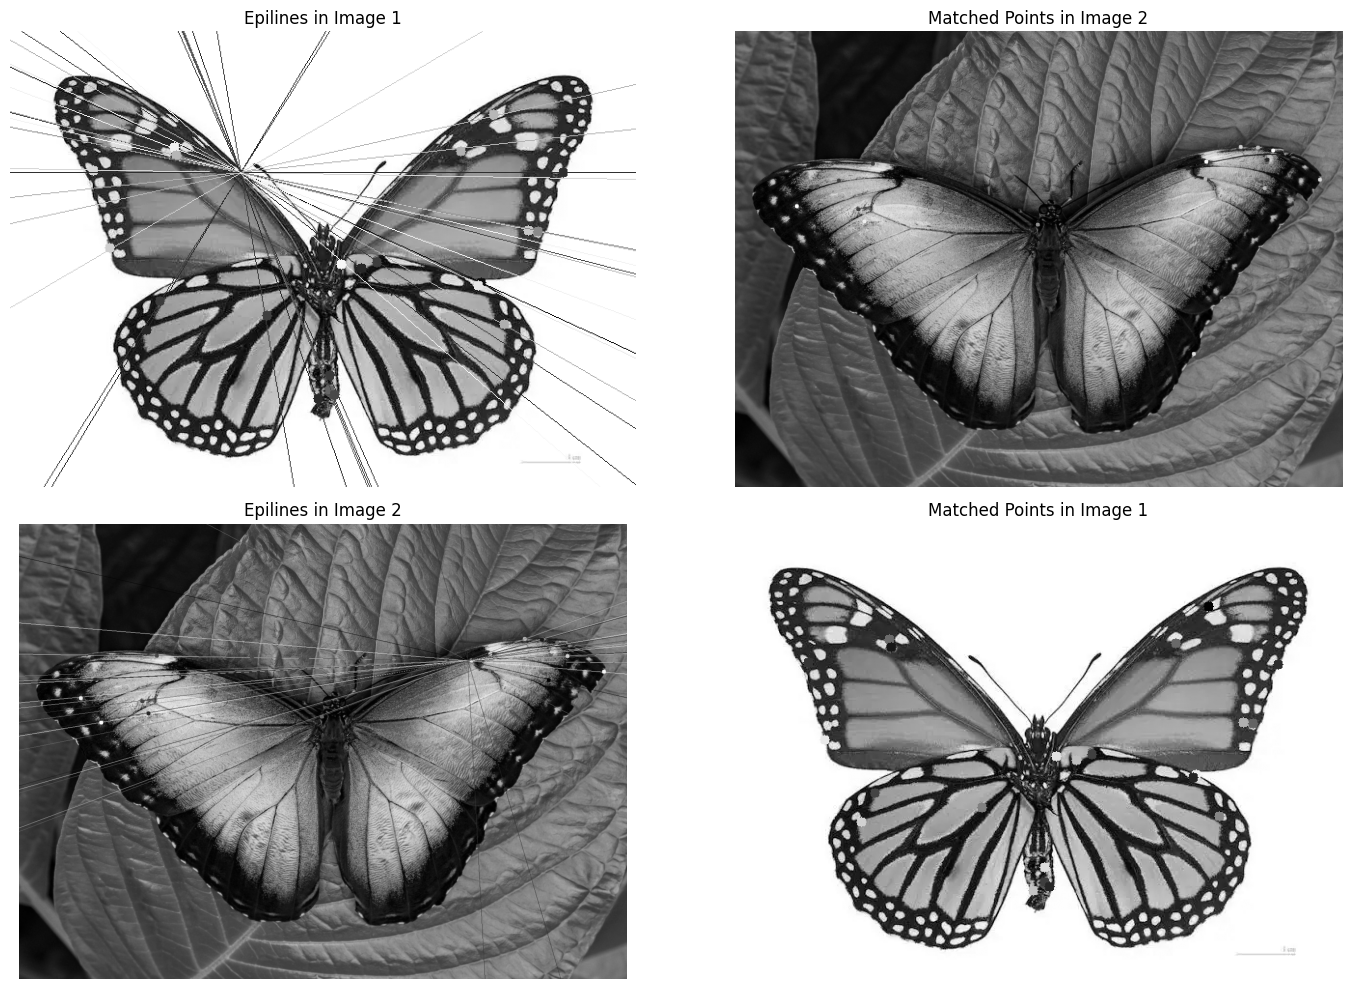

In [10]:
# -------------------------------
# Step 1: Upload images
# -------------------------------
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Change filenames as per uploaded images
img1_name = list(uploaded.keys())[0]
img2_name = list(uploaded.keys())[1]

# Load the two images
img1 = cv2.imread(img1_name, cv2.IMREAD_COLOR)
img2 = cv2.imread(img2_name, cv2.IMREAD_COLOR)

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# -------------------------------
# Step 2: Detect ORB keypoints and descriptors
# -------------------------------
orb = cv2.ORB_create(5000)

kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# -------------------------------
# Step 3: Match features using BFMatcher
# -------------------------------
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

plt.figure(figsize=(15, 7))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Feature Matches")
plt.axis("off")
plt.show()

# -------------------------------
# Step 4: Extract matched points
# -------------------------------
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# -------------------------------
# Step 5: Compute Fundamental Matrix
# -------------------------------
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

print("Fundamental Matrix:\n", F)

# Select inlier points
pts1_inliers = pts1[mask.ravel() == 1]
pts2_inliers = pts2[mask.ravel() == 1]

# -------------------------------
# Step 6: Function to draw epipolar lines
# -------------------------------
def draw_epilines(img1, img2, lines, pts1, pts2):
    """Draw epipolar lines on the images."""
    r, c = img1.shape[:2]
    img1_color = img1.copy()
    img2_color = img2.copy()
    for r_line, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r_line[2] / r_line[1]])
        x1, y1 = map(int, [c, -(r_line[2] + r_line[0] * c) / r_line[1]])
        img1_color = cv2.line(img1_color, (x0, y0), (x1, y1), color, 1)
        img1_color = cv2.circle(img1_color, tuple(pt1[0].astype(int)), 5, color, -1)
        img2_color = cv2.circle(img2_color, tuple(pt2[0].astype(int)), 5, color, -1)
    return img1_color, img2_color

# -------------------------------
# Step 7: Compute & Draw Epipolar Lines
# -------------------------------
# Lines on first image (from points in second)
lines1 = cv2.computeCorrespondEpilines(pts2_inliers.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = draw_epilines(gray1, gray2, lines1, pts1_inliers, pts2_inliers)

# Lines on second image (from points in first)
lines2 = cv2.computeCorrespondEpilines(pts1_inliers.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = draw_epilines(gray2, gray1, lines2, pts2_inliers, pts1_inliers)

# -------------------------------
# Step 8: Show Results
# -------------------------------
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img5, cmap="gray")
plt.title("Epilines in Image 1")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img6, cmap="gray")
plt.title("Matched Points in Image 2")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img3, cmap="gray")
plt.title("Epilines in Image 2")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img4, cmap="gray")
plt.title("Matched Points in Image 1")
plt.axis("off")

plt.tight_layout()
plt.show()

# New Section